# Library

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from lib_pre_data import *
from lib_pre_data import choose_models
from sklearn.metrics import classification_report, confusion_matrix

# Collecting Data

In [26]:
data_train = pd.read_csv('Data/train.csv')
data_test = pd.read_csv('Data/test.csv')
data_results = pd.read_csv('Data/gender_submission.csv')

# Preprocessing Data

In [27]:
data_train['FamilySize'] = data_train['SibSp'] + data_train['Parch'] + 1
data_test['FamilySize'] = data_test['SibSp'] + data_test['Parch'] + 1

data_train['Title'] = data_train['Name'].apply(search_title_name)
data_test['Title'] = data_test['Name'].apply(search_title_name)
title_mapping = {
    "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master", "Dr": "Rare", "Rev": "Rare",
    "Col": "Rare", "Major": "Rare", "Mlle": "Miss", "Countess": "Rare", "Ms": "Miss",
    "Lady": "Rare", "Jonkheer": "Rare", "Don": "Rare", "Dona": "Rare", "Mme": "Mrs",
    "Capt": "Rare", "Sir": "Rare"
}

data_train['Title'] = data_train['Title'].map(title_mapping)
data_test['Title'] = data_test['Title'].map(title_mapping)

In [28]:
data_train['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [29]:
data_train['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886    Rare
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

# Handling missing data and Encoder

In [30]:
data_train['Age'].isnull().sum()

177

In [31]:
imputer = SimpleImputer(strategy = 'median')
data_train['Age'] = imputer.fit_transform(data_train[['Age']])
data_test['Age'] = imputer.transform(data_test[['Age']])
data_train, data_test = encoder_colum(data_train, data_test, 'Sex')
data_train, data_test = encoder_colum(data_train, data_test, 'Title')

In [32]:
data_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [33]:
data_train['Title']

0      2
1      3
2      1
3      3
4      2
      ..
886    4
887    1
888    1
889    2
890    2
Name: Title, Length: 891, dtype: int64

# Split Data

In [34]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Age', 'FamilySize', 'Title']
X_train = data_train[features]
X_test = data_test[features]
y_train = data_train['Survived']
test_value = data_results.iloc[:,-1].values

# Choose Model Classification

In [35]:
choose_models(X_train,y_train,X_test,test_value)

Random Forest Confusion Matrix:
 [[258   8]
 [  5 147]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       266
           1       0.95      0.97      0.96       152

    accuracy                           0.97       418
   macro avg       0.96      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418

Random Forest Cross-validation scores: [0.83798883 0.8258427  0.82022472 0.79775281 0.84831461]
Random Forest Mean cross-validation score: 0.8260247316552632
Decision Tree Confusion Matrix:
 [[223  43]
 [ 40 112]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       266
           1       0.72      0.74      0.73       152

    accuracy                           0.80       418
   macro avg       0.79      0.79      0.79       418
weighted avg       0.80      0.80      0.80       418



# Random Forest Model

In [36]:
classifier = RandomForestClassifier(n_estimators = 200,max_features = 'sqrt',min_samples_leaf = 3,min_samples_split = 3,max_depth = 3, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
predictions_value = classifier.predict(X_test)

# Visualization

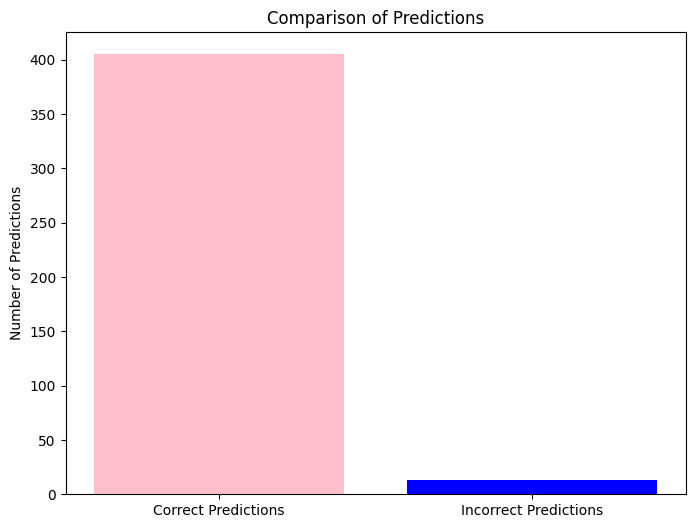

In [37]:
compare = pd.DataFrame({'Predictions': predictions_value, 'Actual': test_value})
correct_predictions = (compare['Predictions'] == compare['Actual']).sum()
incorrect_predictions = (compare['Predictions'] != compare['Actual']).sum()
labels = ['Correct Predictions', 'Incorrect Predictions']
values = [correct_predictions, incorrect_predictions]
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['pink', 'blue'])
plt.title('Comparison of Predictions')
plt.ylabel('Number of Predictions')
plt.show()